In [497]:
import warnings


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from sklearn.exceptions import ConvergenceWarning

import matplotlib.pyplot as plt

In [512]:
X, y = make_classification(
    n_samples=100000, 
    n_features=10, 
    n_classes=3, 
    n_informative=10, 
    n_redundant=0,
    weights=[0.49, 0.49, 0.02], 
    random_state=42
)

class_weights = compute_class_weight("balanced", classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [513]:
class_weights

{0: np.float64(0.6821235871515201),
 1: np.float64(0.6824168475071313),
 2: np.float64(14.575134819997086)}

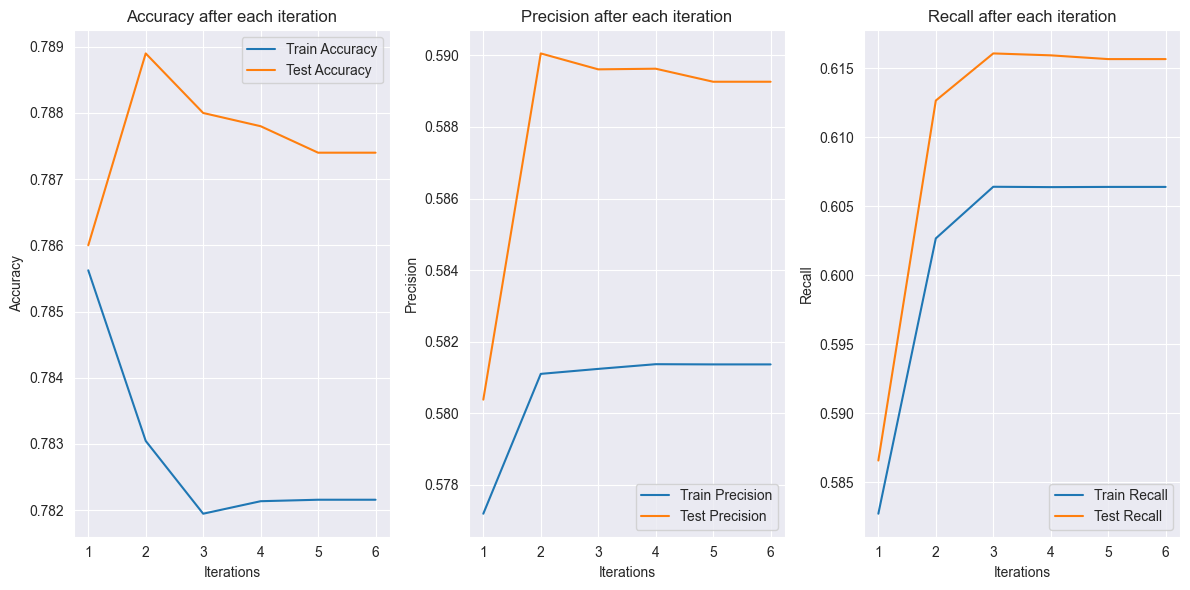

In [514]:
clf = LogisticRegression(class_weight=class_weights, random_state=42, max_iter=1, warm_start=True, solver='liblinear')


train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []

iterations = 6
for i in range(iterations):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Store the accuracies
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    # Calculate precision and recall
    train_prec = precision_score(y_train, y_train_pred, average='macro')
    test_prec = precision_score(y_test, y_test_pred, average='macro')
    train_rec = recall_score(y_train, y_train_pred, average='macro')
    test_rec = recall_score(y_test, y_test_pred, average='macro')
    
    # Store precision and recall
    train_precisions.append(train_prec)
    test_precisions.append(test_prec)
    train_recalls.append(train_rec)
    test_recalls.append(test_rec)
    
    # Increment the number of iterations for the next fit
    clf.max_iter += 1

# Plot the accuracies
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, iterations + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, iterations + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy after each iteration')
plt.legend()

# Plot the precision
plt.subplot(1, 3, 2)
plt.plot(range(1, iterations + 1), train_precisions, label='Train Precision')
plt.plot(range(1, iterations + 1), test_precisions, label='Test Precision')
plt.xlabel('Iterations')
plt.ylabel('Precision')
plt.title('Precision after each iteration')
plt.legend()

# Plot the recall
plt.subplot(1, 3, 3)
plt.plot(range(1, iterations + 1), train_recalls, label='Train Recall')
plt.plot(range(1, iterations + 1), test_recalls, label='Test Recall')
plt.xlabel('Iterations')
plt.ylabel('Recall')
plt.title('Recall after each iteration')
plt.legend()

plt.tight_layout()
plt.show()


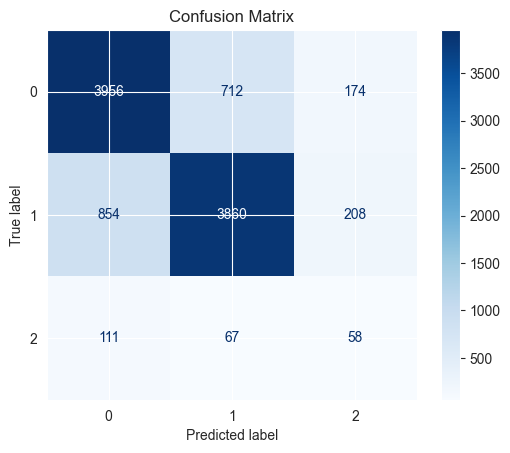

In [515]:
# Confusion matrix for the final iteration
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [507]:
clf.predict([X[0]])

array([2])